In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import sys, os, importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [3]:
repo_paths = ['/home/simonealbanesi/repos/IPAM2021_ML/', '/home/simone/repos/IPAM2021_ML/', 
             '/Users/simonealbanesi/repos/IPAM2021_ML/']
for rp in repo_paths:
    if os.path.isdir(rp):
        repo_path = rp
        break
sys.path.insert(0, repo_path+'utils/')

In [4]:
import fancyplots as fp
import sklassyNN  as sknn
import errsurf
#from split_GstLAL_data import split_GstLAL_data

## Input

In [5]:
hlayers_sizes   = (400,400)
seed            = 1
verbose_train   = True
epochs          = 50
batch_size      = 128
SNR_min         = 0 # used only in train-dataset

show_figs       = True
save_figs       = False

compact_bounds  = {}
#features2use    = 'm1Mcchi1chi2'
#compact_bounds['A'] = [0.75, 0.75, -1, -1]
#compact_bounds['B'] = [500,  130,  1,  1] # before MCD6 was [400,1,1,120]
features2use = 'm1m2chi1chi2'
compact_bounds['A'] = [0.75, 0.75, -1, -1]
compact_bounds['B'] = [500,   250,  1,  1]

learning_rate  = 0.001;

show_err_distr = False

# Warning 1: using out_interval=None is not equivalnt to linear_output=True!!
# Warning 2: using linear_output=True can produce unphysical prediction!

data_path = repo_path+'datasets/GstLAL/'

show_errsurf = False
do_crossval  = False

save_model   = False
model_name   = "sklassyNN_"+features2use

save_prediction = False

## Load data

--------------------------------------------------  train  -------------------------------------------------


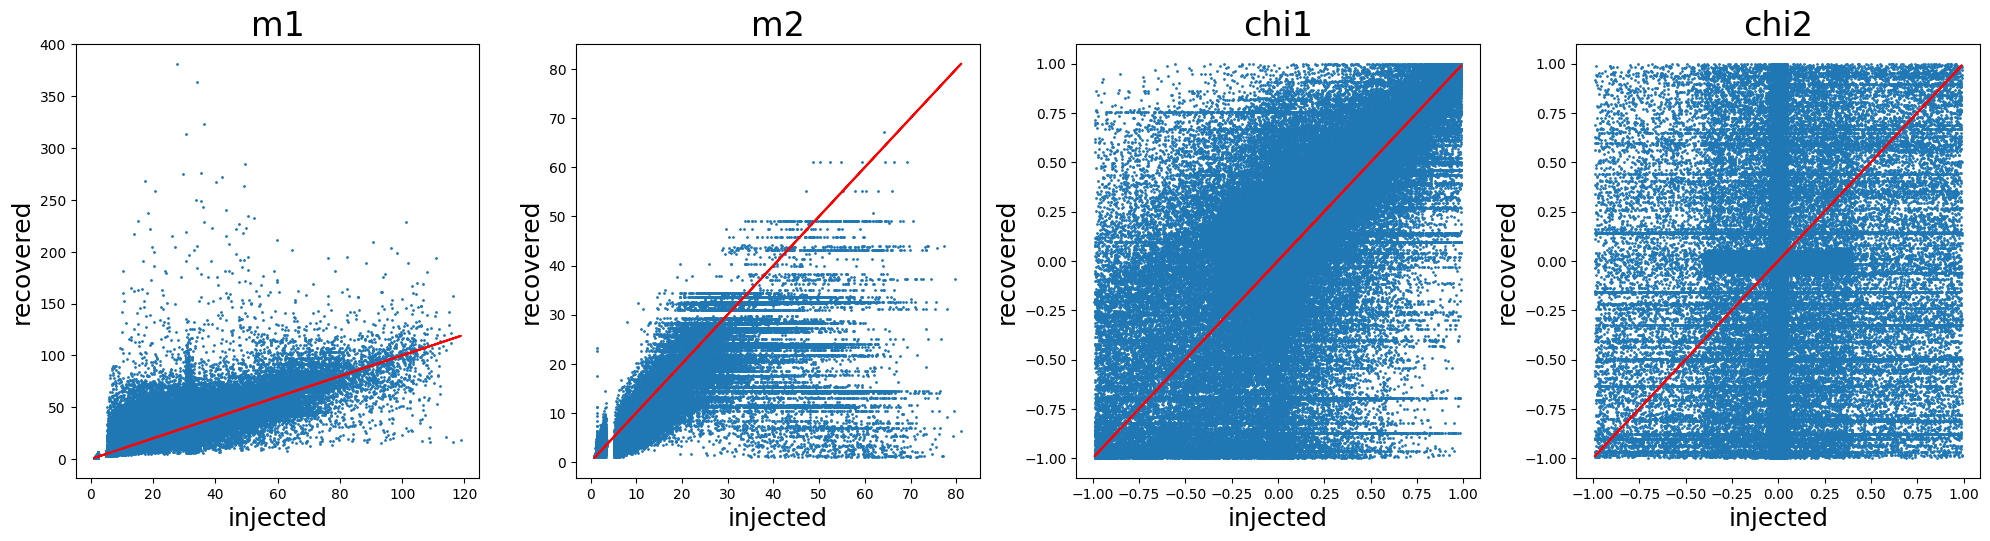

--------------------------------------------------  test  -------------------------------------------------


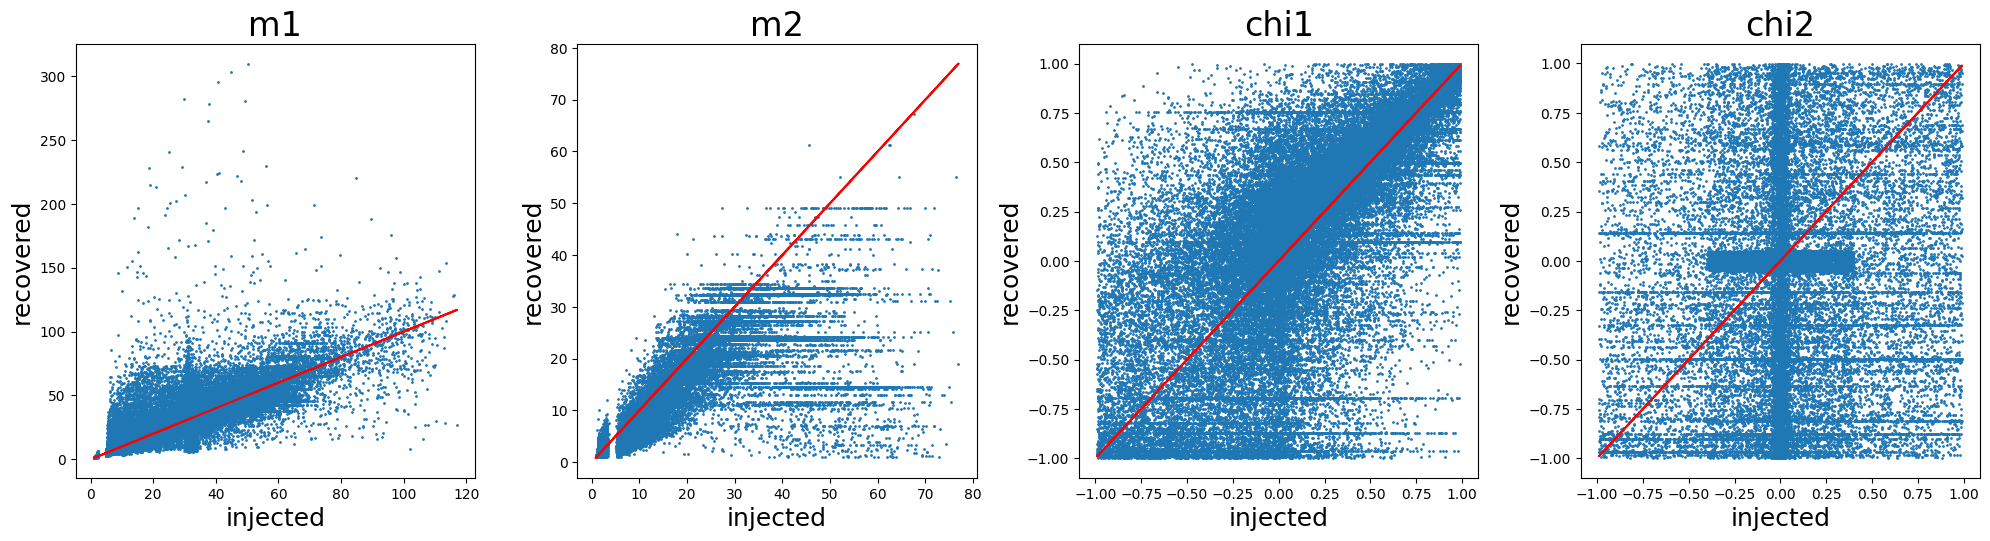

In [6]:
train_inj_all = sknn.extract_data(data_path+'complete_ytrain.csv') # m1, m2, Mc, chi1, chi2
train_rec_all = sknn.extract_data(data_path+'complete_xtrain.csv')
test_inj_all  = sknn.extract_data(data_path+'complete_ytest.csv')
test_rec_all  = sknn.extract_data(data_path+'complete_xtest.csv')

if features2use=='m1Mcchi1chi2':
    train_inj = np.delete(train_inj_all, 1, axis=1)
    train_rec = np.delete(train_rec_all, 1, axis=1)
    test_inj  = np.delete( test_inj_all, 1, axis=1)
    test_rec  = np.delete( test_rec_all, 1, axis=1)
    names     = ['m1', 'Mc', 'chi1', 'chi2']
elif features2use=='m1m2chi1chi2':
    train_inj = np.delete(train_inj_all, 2, axis=1)
    train_rec = np.delete(train_rec_all, 2, axis=1)
    test_inj  = np.delete( test_inj_all, 2, axis=1)
    test_rec  = np.delete( test_rec_all, 2, axis=1)
    names     = ['m1', 'm2', 'chi1', 'chi2']

nfeatures = len(train_inj[0,:])

print('-'*50,' train ','-'*49)
plt.figure(figsize=(20,10))
for i in range(nfeatures):
    ax = plt.subplot(241+i)
    ax.scatter(train_inj[:,i], train_rec[:,i],s=1)
    ax.plot(train_inj[:,i], train_inj[:,i], 'r')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel('injected', fontsize=18)
    ax.set_ylabel('recovered', fontsize=18)
plt.tight_layout()
if save_figs:
    plt.savefig('rec_vs_inj_train.png',dpi=200,bbox_inches='tight')
if show_figs:
    plt.show()
else:
    plt.close()
    
print('-'*50,' test ','-'*49)
plt.figure(figsize=(20,10))
for i in range(nfeatures):
    ax = plt.subplot(241+i)
    ax.scatter(test_inj[:,i], test_rec[:,i],s=1)
    ax.plot(test_inj[:,i], test_inj[:,i], 'r')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel('injected', fontsize=18)
    ax.set_ylabel('recovered', fontsize=18)
plt.tight_layout()
if save_figs:
    plt.savefig('rec_vs_inj_test.png',dpi=200,bbox_inches='tight')
if show_figs:
    plt.show()
else:
    plt.close()

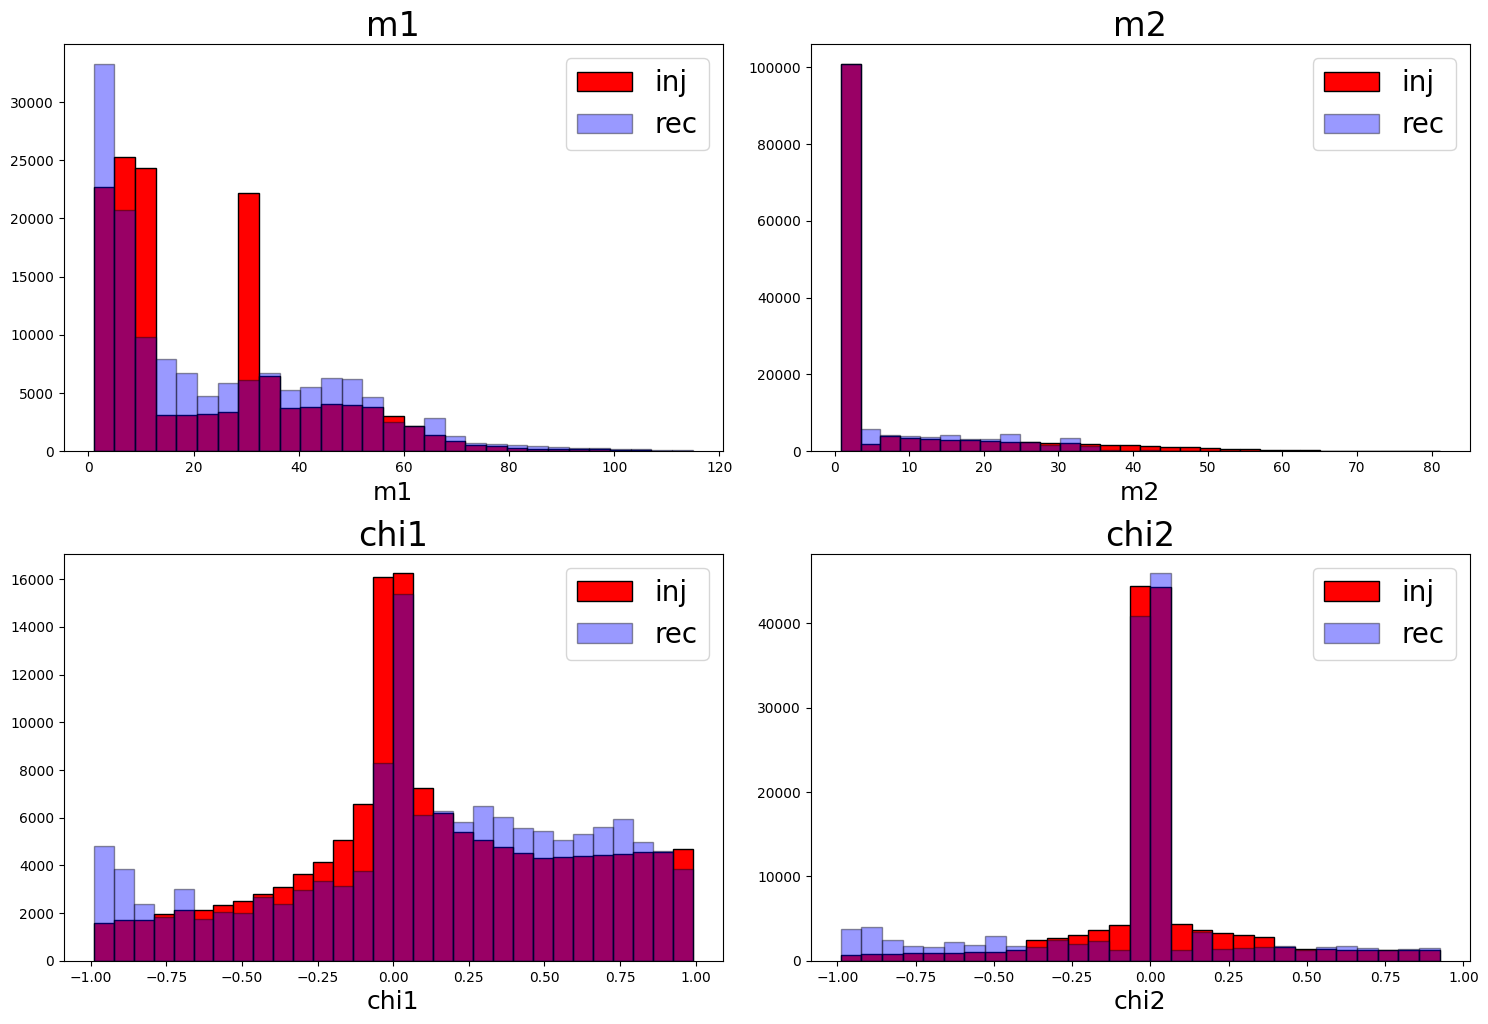

In [7]:
plt.figure(figsize=(15,20))
nbins = 30
for i in range(nfeatures):
    ax = plt.subplot(4,2,i+1)
    fmin = min(train_inj[:,i])
    fmax = max(train_inj[:,i])
    fstep = (fmax-fmin)/nbins
    ax.hist(train_inj[:,i], bins=np.arange(fmin, fmax, fstep), alpha=1,   color=[1,0,0], label='inj', ec='black')
    ax.hist(train_rec[:,i], bins=np.arange(fmin, fmax, fstep), alpha=0.4, color=[0,0,1], label='rec', ec='black')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel(names[i], fontsize=18)
    ax.legend(fontsize=20)
plt.tight_layout()
if save_figs:
    plt.savefig('distr.png',dpi=200,bbox_inches='tight')
if show_figs:
    plt.show()
else:
    plt.close()

In [8]:
NN = sknn.RegressionNN(hlayers_sizes=hlayers_sizes, seed=seed)

In [9]:
NN.load_train_dataset(xtrain_data=train_rec, ytrain_data=train_inj, 
                      verbose=False, compact_bounds=compact_bounds)


--------------------------------------------------------------------------------
feature n.1
--------------------------------------------------------------------------------


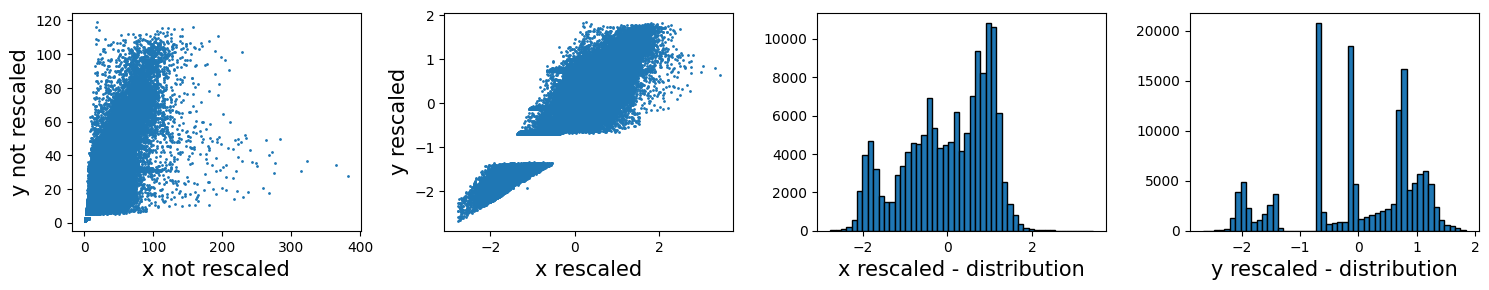

max diff check :  8.526512829121202e-14
NaN found in Y :  0
NaN found in X1:  0 



--------------------------------------------------------------------------------
feature n.2
--------------------------------------------------------------------------------


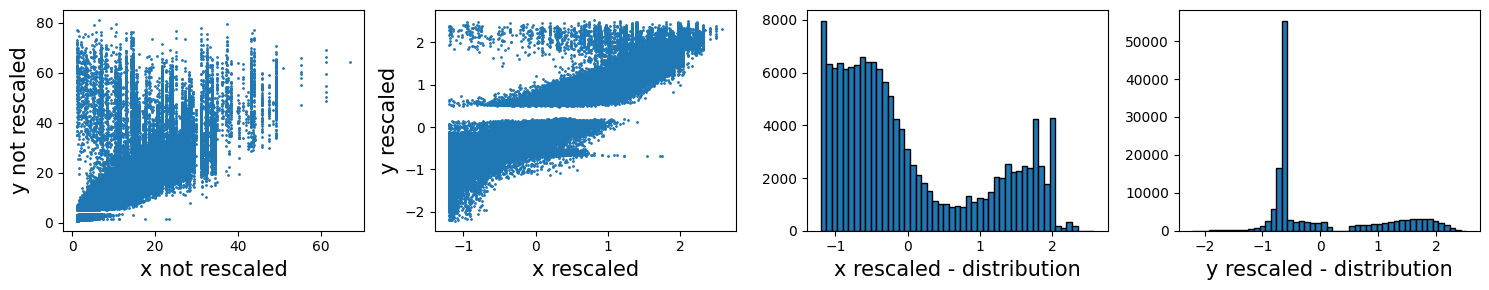

max diff check :  3.552713678800501e-14
NaN found in Y :  0
NaN found in X1:  0 



--------------------------------------------------------------------------------
feature n.3
--------------------------------------------------------------------------------


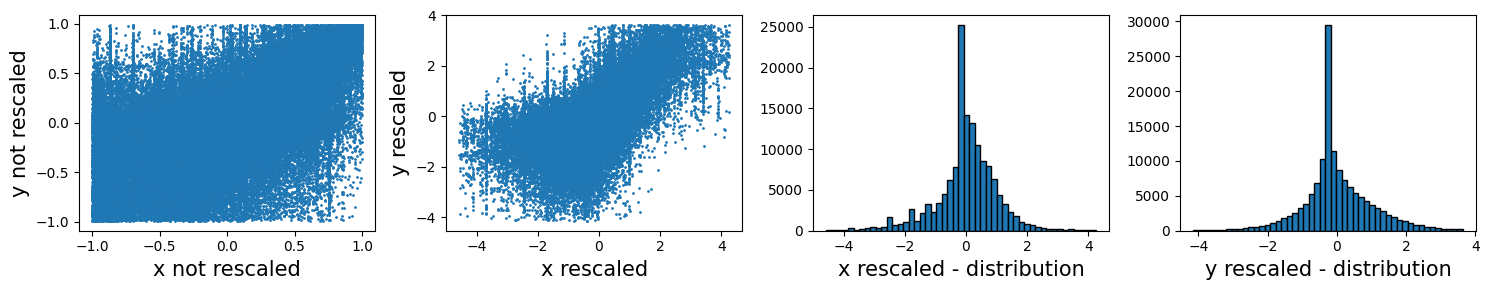

max diff check :  3.3306690738754696e-16
NaN found in Y :  0
NaN found in X1:  0 



--------------------------------------------------------------------------------
feature n.4
--------------------------------------------------------------------------------


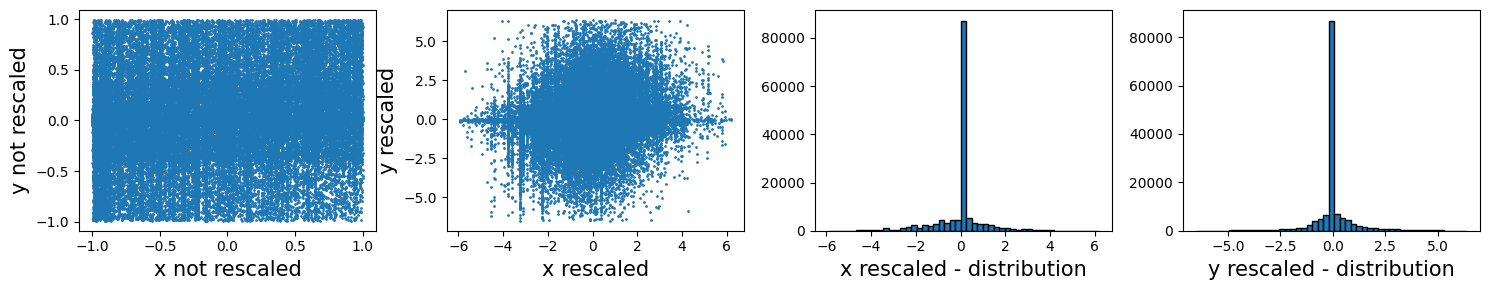

max diff check :  3.3306690738754696e-16
NaN found in Y :  0
NaN found in X1:  0 





In [10]:
X0 = NN.xtrain_notnorm
Y  = NN.scaler_x.transform(X0)
X1 = NN.scaler_x.inverse_transform(Y)

for i in range(NN.nfeatures):
    print('-'*80, 'feature n.'+str(i+1), '-'*80, sep='\n')
    plt.figure(figsize=(15,3))
    plt.subplot(141)
    plt.scatter(NN.xtrain_notnorm[:,i], NN.ytrain_notnorm[:,i], s=1)
    plt.xlabel('x not rescaled', fontsize=15)
    plt.ylabel('y not rescaled', fontsize=15)
    plt.subplot(142)
    plt.scatter(NN.xtrain[:,i], NN.ytrain[:,i], s=1)
    plt.xlabel('x rescaled', fontsize=15)
    plt.ylabel('y rescaled', fontsize=15)
    nan_counter_Y  = 0
    nan_counter_X1 = 0
    for j in range(len(Y[:,i])):
        y  =  Y[j,i]
        x1 = X1[j,i]
        if np.isnan(y):
            nan_counter_Y += 1
        if np.isnan(x1):
            nan_counter_X1 += 1
    if nan_counter_Y == 0:
        plt.subplot(143)
        x = NN.xtrain[:,i]
        plt.hist(x, bins=np.linspace(min(x), max(x), 50), histtype='bar', ec='black')
        #plt.hist(Y[:,i], bins=np.linspace(min(x), max(x), 50), alpha=0.5, histtype='bar', ec='black')
        plt.xlabel('x rescaled - distribution', fontsize=15)
        plt.subplot(144)
        y = NN.ytrain[:,i]
        plt.hist(y, bins=np.linspace(min(y), max(y), 50), histtype='bar', ec='black')
        plt.xlabel('y rescaled - distribution', fontsize=15)
    plt.tight_layout()
    if save_figs:
        plt.savefig('scaler_feature'+str(i)+'.png',dpi=200,bbox_inches='tight')
    if show_figs:
        plt.show()
    else:
        plt.close()
    diff = X1[:,i]-X0[:,i]
    print('max diff check : ', max(diff))
    print('NaN found in Y : ', nan_counter_Y)
    print('NaN found in X1: ', nan_counter_X1, '\n\n\n')

In [11]:
NN.training(epochs=epochs, batch_size=batch_size, verbose=verbose_train, learning_rate=learning_rate)

Iteration 1, loss = 0.16335232
Iteration 2, loss = 0.15642038
Iteration 3, loss = 0.15494167
Iteration 4, loss = 0.15404785
Iteration 5, loss = 0.15344478
Iteration 6, loss = 0.15297478
Iteration 7, loss = 0.15254169
Iteration 8, loss = 0.15218275
Iteration 9, loss = 0.15186318
Iteration 10, loss = 0.15156447
Iteration 11, loss = 0.15129265
Iteration 12, loss = 0.15110065
Iteration 13, loss = 0.15089484
Iteration 14, loss = 0.15071234
Iteration 15, loss = 0.15055764
Iteration 16, loss = 0.15042834
Iteration 17, loss = 0.15027225
Iteration 18, loss = 0.15015140
Iteration 19, loss = 0.15003610
Iteration 20, loss = 0.14990727
Iteration 21, loss = 0.14983770
Iteration 22, loss = 0.14973560
Iteration 23, loss = 0.14965331
Iteration 24, loss = 0.14958350
Iteration 25, loss = 0.14950122
Iteration 26, loss = 0.14942577
Iteration 27, loss = 0.14937764
Iteration 28, loss = 0.14930605
Iteration 29, loss = 0.14924471
Iteration 30, loss = 0.14919769
Iteration 31, loss = 0.14911851
Iteration 32, los

In [12]:
if save_model:
    NN.save_model(model_name=model_name, verbose=True, overwrite=True)

In [13]:
print(NN.training_time)

286.130605917


In [14]:
NN.load_test_dataset(xtest_data=test_rec, ytest_data=test_inj, verbose=True)

In [15]:
print(np.shape(NN.xtest))

(61107, 4)


In [16]:
print('-'*25, 'R2 for recovery', '-'*25)
def R2_numpy(y_true, y_pred):
            SS_res = np.sum((y_true - y_pred )**2)
            SS_tot = np.sum((y_true - np.mean(y_true))**2)
            return 1-SS_res/SS_tot
for i in range(nfeatures):
    R2 = R2_numpy(test_inj[:,i], test_rec[:,i])  
    print('R2[{:2d}]         : {:.5f}'.format(i,R2))

print('-'*25, 'R2 for prediction', '-'*23)
NN.print_metrics()

"""
print('-'*25, 'R2 for prediction, check', '-'*23)
test_pred = NN.compute_prediction(NN.xtest, transform_output=True)
for i in range(nfeatures):
    R2 = R2_numpy(test_inj[:,i], test_pred[:,i])  
    print('R2[{:2d}]         : {:.5f}'.format(i,R2))
""";

------------------------- R2 for recovery -------------------------
R2[ 0]         : 0.61438
R2[ 1]         : 0.67551
R2[ 2]         : 0.28889
R2[ 3]         : -1.61491
------------------------- R2 for prediction -----------------------
Final R2 mean  : 0.70617
R2[ 0]         : 0.96715
R2[ 1]         : 0.96916
R2[ 2]         : 0.74569
R2[ 3]         : 0.14268


## Histograms

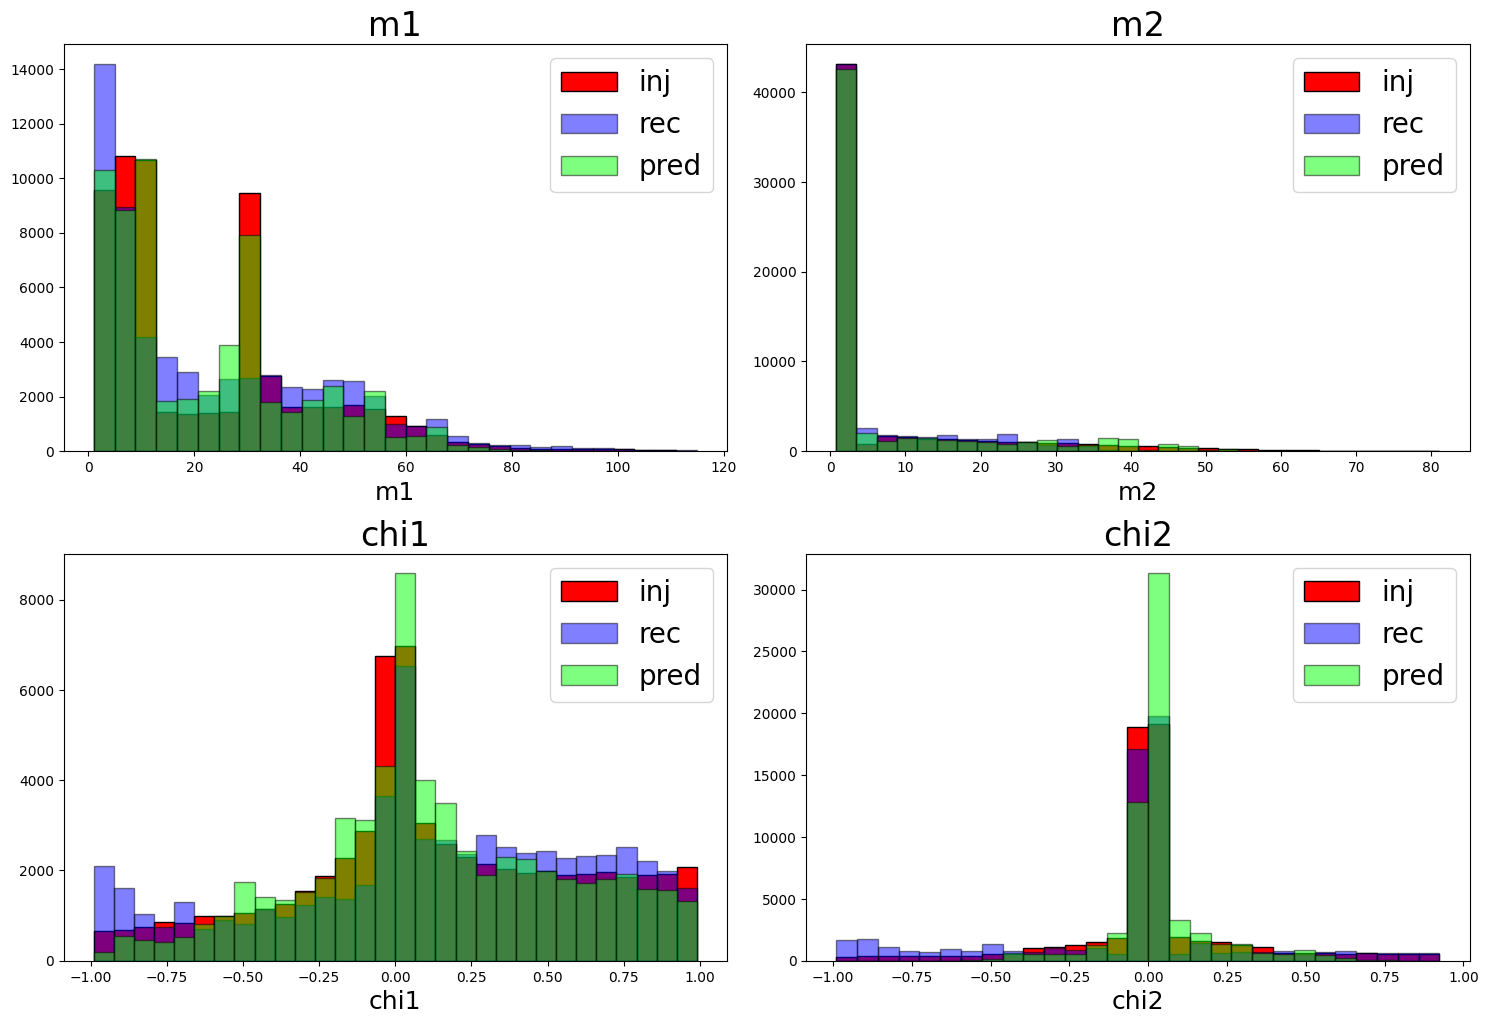

In [17]:
pred = NN.compute_prediction(NN.xtest, transform_output=True) # normalized prediction
plt.figure(figsize=(15,20))
nbins = 30
for i in range(nfeatures):
    ax = plt.subplot(4,2,i+1)
    fmin = min(train_inj[:,i])
    fmax = max(train_inj[:,i])
    fstep = (fmax-fmin)/nbins
    ax.hist(test_inj[:,i], bins=np.arange(fmin, fmax, fstep), alpha=1,   color=[1,0,0], label='inj', ec='black')
    ax.hist(test_rec[:,i], bins=np.arange(fmin, fmax, fstep), alpha=0.5, color=[0,0,1], label='rec', ec='black')
    ax.hist( pred[:,i], bins=np.arange(fmin, fmax, fstep), alpha=0.5, color=[0,1,0], label='pred', ec='black')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel(names[i], fontsize=18)
    ax.legend(fontsize=20)
plt.tight_layout()
if save_figs:
    plt.savefig('distr_wpred.png',dpi=200,bbox_inches='tight')
if show_figs:
    plt.show()
else:
    plt.close()

------------------------------------------------ m1 --------------------------------------------------
mean rec   rel diff  :  -0.17260 (std= 0.59560, | rel diff |= 0.35161)
mean pred  rel diff  :  -0.01949 (std= 0.29248, | rel diff |= 0.13416)


median rec   rel diff  :  -0.08853
median pred  rel diff  :   0.00392


recovery   below fmin=-10.00: 10
recovery   above fmax=  2.00: 0
prediction below fmin=-10.00: 0
prediction above fmax=  2.00: 0


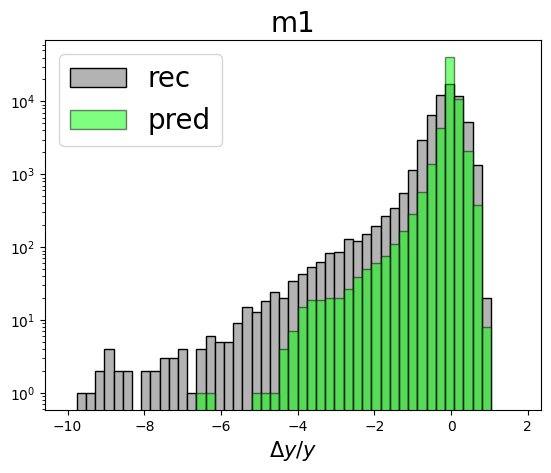

----------------------------------------------   m2 --------------------------------------------------
mean rec   rel diff  :   0.04695 (std= 0.35129, | rel diff |= 0.25608)
mean pred  rel diff  :  -0.01799 (std= 0.33079, | rel diff |= 0.12343)


median rec   rel diff  :   0.09621
median pred  rel diff  :   0.01430


recovery   below fmin= -3.00: 3
recovery   above fmax=  1.70: 0
prediction below fmin= -3.00: 32
prediction above fmax=  1.70: 0


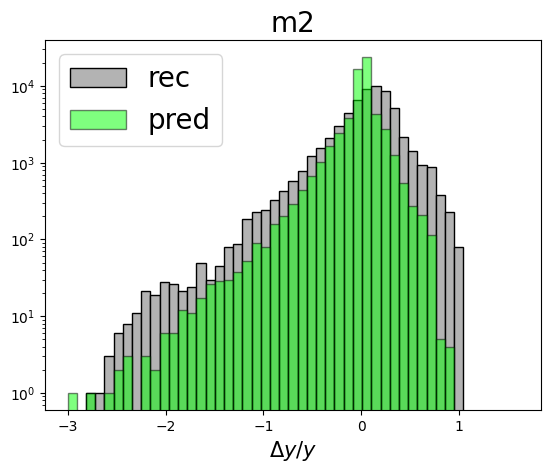

---------------------------------------------- chi1 --------------------------------------------------
mean rec  difference :  -0.00187 (std= 0.38802, |difference|= 0.26624)
mean pred difference :   0.00197 (std= 0.23566, |difference|= 0.13783)


median rec  difference :  -0.02135
median pred difference :   0.00310


recovery   below fmin= -1.70: 1
recovery   above fmax=  1.70: 24
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 0


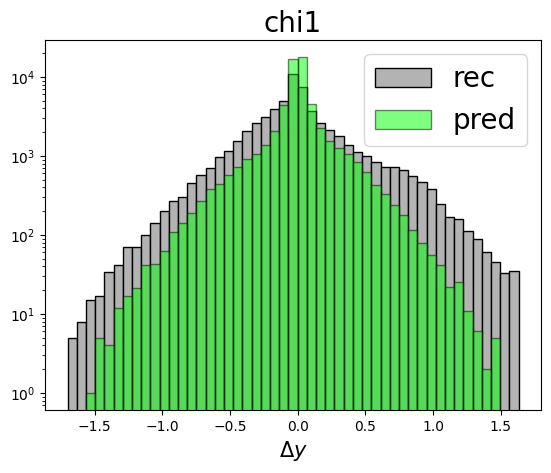

---------------------------------------------- chi2 --------------------------------------------------
mean rec  difference :   0.06879 (std= 0.45961, |difference|= 0.27732)
mean pred difference :  -0.01245 (std= 0.26815, |difference|= 0.15273)


median rec  difference :   0.00418
median pred difference :  -0.01180


recovery   below fmin= -1.70: 44
recovery   above fmax=  1.70: 165
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 0


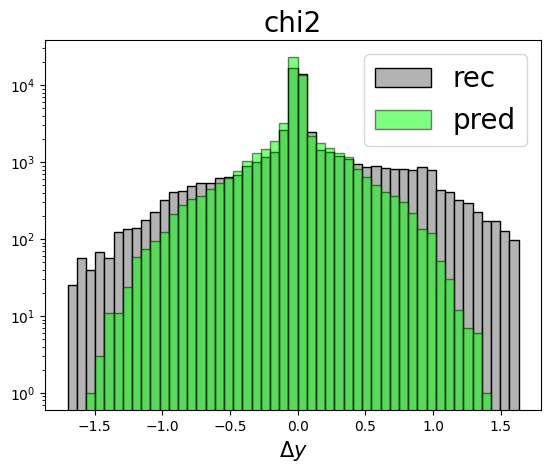

In [18]:
"""
nolatex_names = [ 'm1',   'm2', ' chi1',  'chi2',    'Mc',    'q',  'R_ISCO',     'C']
fmin_vec      = [   -4,     -3,    -1.7,    -1.7,    -1.5,     -4,      -1.7,    -0.5]
fmax_vec      = [    1,      1,     1.7,     1.7,     1.0,    1.2,       0.8,     0.5]
abs_diff_vec  = [False,  False,    True,    True,   False,  False,     False,    True]
logscale_vec  = [False,  False,   False,   False,    True,  False,     False,   False]
"""
if features2use=='m1Mcchi1chi2':
    nolatex_names = [ 'm1',   'Mc',   'chi1',  'chi2']
    fmin_vec      = [   -4,    -1.5,   -1.7,     -1.7]
    fmax_vec      = [    1,     1.0,    1.7,      1.7]
    abs_diff_vec  = [False,    False,  True,     True]
    logscale_vec  = [False,    True,   False,    True]
else:
    nolatex_names = [ 'm1',   '  m2',  'chi1',   'chi2']
    fmin_vec      = [   -10,     -3.,    -1.7,    -1.7 ]
    fmax_vec      = [    2,      1.7,     1.7,     1.7 ]
    abs_diff_vec  = [False,     False,    True,    True ]
    logscale_vec  = [ True,      True,    True,    True]


for i in range(nfeatures):
    print('-'*(50-len(nolatex_names[i])), nolatex_names[i], '-'*50)
    NN.plot_err_histogram(feature_idx=i, fmin=fmin_vec[i], fmax=fmax_vec[i], verbose=True, 
                          abs_diff=abs_diff_vec[i], name=names[i], show=show_figs, save=save_figs, 
                          logscale=logscale_vec[i], nbins=50)

In [19]:
#test_prediction = NN.compute_prediction(NN.xtest, transform_output=True)
#cnn.write_result('cNN_prediction.csv', test_prediction, verbose=True)

## Other plots 

In [20]:
import importlib
importlib.reload(fp)

<module 'fancyplots' from '/Users/simonealbanesi/repos/IPAM2021_ML/utils/fancyplots.py'>

prediction-time:  0.391325457999983


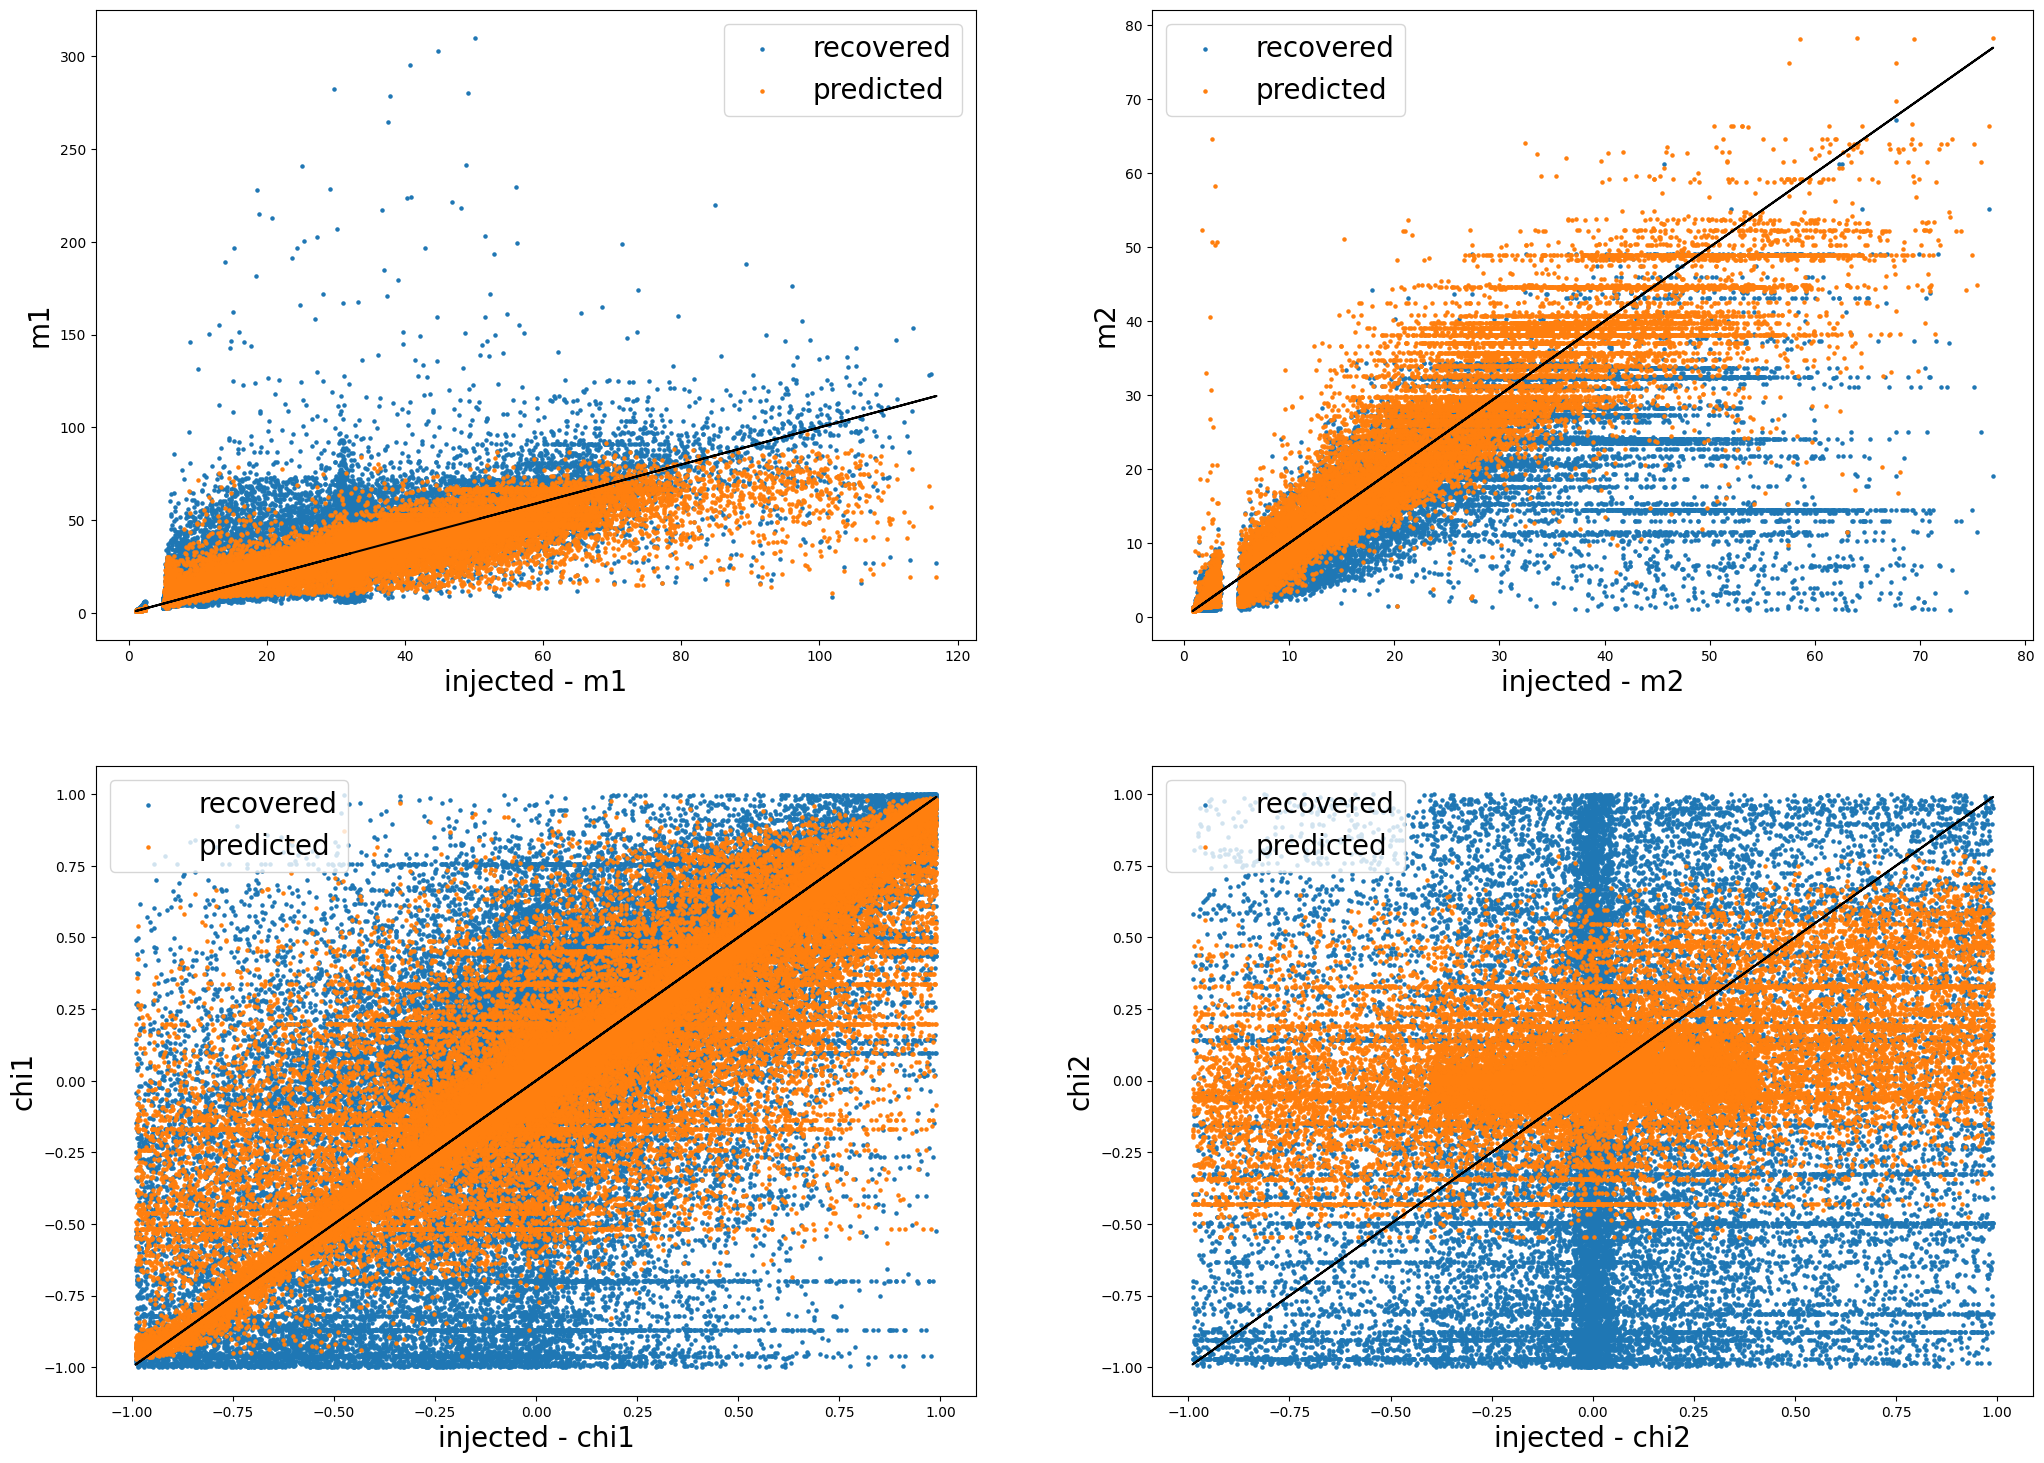

In [21]:
prediction = NN.compute_prediction(NN.xtest, verbose=True) # normalized prediction
fp.checkRegressionPlot(NN.xtest, NN.ytest, prediction, names, 
                              scaler_y=NN.scaler_y, scaler_x=NN.scaler_x, show=show_figs, save=save_figs)

In [22]:
predicted = NN.compute_prediction(NN.xtest, transform_output=True, verbose=True)
injected  = NN.ytest_notnorm
recovered = NN.xtest_notnorm

prediction-time:  0.41079370900001777


In [23]:
if save_prediction:
    prediction_path = repo_path + 'algo/classy_NN/sklassy_prediction/'
    if features2use=='mass&spin':
        fname = prediction_path+'complete_prediction_m1Mcchi1chi2.csv'
    else:
        fname = prediction_path+'complete_prediction_'+features2use+'.csv'
    sknn.write_result(fname, predicted, verbose=True)

In [24]:
# measure comp-time for only one event 
NN.compute_prediction(NN.xtest[0,:], transform_output=True, verbose=True);

prediction-time:  0.00037866599996050354


In [25]:
if nfeatures==8:
    m1_pred = predicted[:,0]
    m2_pred = predicted[:,1]
    Mc_pred = predicted[:,4]

    m1_inj  = injected[:,0]
    m2_inj  = injected[:,1]
    Mc_inj  = injected[:,4]

    m1_rec  = recovered[:,0]
    m2_rec  = recovered[:,1]
    Mc_rec  = recovered[:,4]

    def compute_Mc(m1,m2):
        return (m1*m2)**(3/5)/(m1+m2)**(1/5)

    Mc_comp = compute_Mc(m1_pred, m2_pred)

    color_rec  = np.array([0.6,0.6,0.6])
    color_pred = np.array([0,1,0])
    color_comp = np.array([1,0,0])

    plt.figure
    plt.scatter(Mc_inj, Mc_rec , s=1, c=color_rec.reshape(1,-1))
    plt.scatter(Mc_inj, Mc_pred, s=1, c=color_pred.reshape(1,-1))
    plt.scatter(Mc_inj, Mc_comp, s=1, c=color_comp.reshape(1,-1))
    plt.plot(Mc_inj, Mc_inj, c=[0,0,0])
    plt.xlabel(r'$M_c$ - inj', fontsize=15)
    plt.ylabel(r'$M_c$', fontsize=15)
    if save_figs:
        plt.savefig('Mc.png',dpi=200,bbox_inches='tight')
    if show_figs:
        plt.show()
    else:
        plt.close()

    nbins = 31

    errors_rec  = (Mc_inj- Mc_rec )/Mc_inj
    errors_pred = (Mc_inj- Mc_pred)/Mc_inj
    errors_comp = (Mc_inj- Mc_comp)/Mc_inj

    fmin  = -3
    fmax  =  3
    fstep = (fmax-fmin)/nbins

    pred_min_outliers = 0 
    pred_max_outliers = 0 
    for i in range(len(errors_pred)):
        if errors_pred[i]<fmin:
            pred_min_outliers += 1
    for i in range(len(errors_pred)):
        if errors_pred[i]>fmax:
            pred_max_outliers += 1 
    rec_min_outliers = 0 
    rec_max_outliers = 0 
    for i in range(len(errors_rec)):
        if errors_rec[i]<fmin:
            rec_min_outliers += 1
    for i in range(len(errors_rec)):
        if errors_rec[i]>fmax:
            rec_max_outliers += 1 
    comp_min_outliers = 0 
    comp_max_outliers = 0 
    for i in range(len(errors_comp)):
        if errors_comp[i]<fmin:
            comp_min_outliers += 1
    for i in range(len(errors_comp)):
        if errors_comp[i]>fmax:
            comp_max_outliers += 1 

    print('recovery    below fmin={:6.2f}: {:d}'.format(fmin,  rec_min_outliers))
    print('recovery    above fmax={:6.2f}: {:d}'.format(fmax,  rec_max_outliers))
    print('prediction  below fmin={:6.2f}: {:d}'.format(fmin, pred_min_outliers))
    print('prediction  above fmax={:6.2f}: {:d}'.format(fmax, pred_max_outliers))
    print('computation below fmin={:6.2f}: {:d}'.format(fmin, comp_min_outliers))
    print('computation above fmax={:6.2f}: {:d}'.format(fmax, comp_max_outliers))

    plt.figure
    plt.hist(errors_rec , bins=np.arange(fmin, fmax, fstep), alpha=1.0, color=color_rec,  label='rec',
             histtype='bar', ec='black')
    plt.hist(errors_pred, bins=np.arange(fmin, fmax, fstep), alpha=0.7, color=color_pred, label='pred',
             histtype='bar', ec='black')
    plt.hist(errors_comp, bins=np.arange(fmin, fmax, fstep), alpha=0.5, color=color_comp, label='comp',
             histtype='bar', ec='black')
    plt.legend(fontsize=20)
    plt.xlabel(r'$\Delta y/y$', fontsize=15)
    if save_figs:
        plt.savefig('err_hist_Mc.png',dpi=200,bbox_inches='tight')
    if show_figs:
        plt.show()
    else:
        plt.close()

In [26]:
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

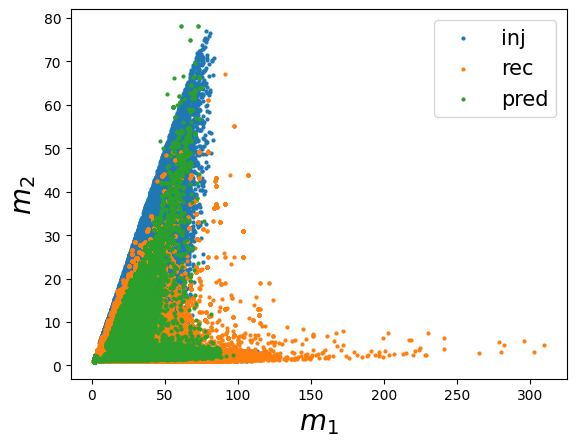

In [27]:
plt.figure
plt.scatter( injected[:,0],  injected[:,1], s=4, label='inj')
plt.scatter(recovered[:,0], recovered[:,1], s=4, label='rec')
plt.scatter(predicted[:,0], predicted[:,1], s=4, label='pred')
plt.xlabel(r'$m_1$', fontsize=20)
if features2use=='m1Mcchi1chi2':
    plt.ylabel(r'$M_c$', fontsize=20)
else:
    plt.ylabel(r'$m_2$', fontsize=20)
plt.legend(fontsize=15)
plt.show()

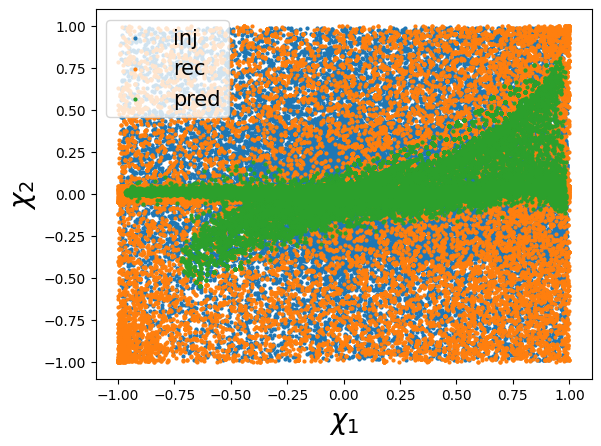

In [28]:
plt.figure
plt.scatter( injected[:,2],  injected[:,3], s=4, label='inj')
plt.scatter(recovered[:,2], recovered[:,3], s=4, label='rec')
plt.scatter(predicted[:,2], predicted[:,3], s=4, label='pred')
plt.xlabel(r'$\chi_1$', fontsize=20)
plt.ylabel(r'$\chi_2$', fontsize=20)
plt.legend(fontsize=15)
plt.show()

## Error statistics

In [29]:
# Note that this is on train-dataset! We need the training-prediction to compute the error-statistic (I think)
predicted = NN.compute_prediction(NN.xtrain, transform_output=True)
injected  = NN.ytrain_notnorm
recovered = NN.xtrain_notnorm

In [30]:
if show_errsurf:
    importlib.reload(errsurf)

    feature_names = ['m1', 'chi1', 'chi2', 'Mc']

    x0_list         = {}
    x0_list['m1']   = [2, 10, 31.5]
    x0_list['chi1'] = [-0.9,0,0.9]
    x0_list['chi2'] = [-0.3,0,0.5]
    x0_list['Mc']   = [2,8,20,60]
    exp_step_vec    = [True, False, False, True]
    log_scale_vec   = [True, False, False, True]
    esurf_list = []
    for i in range(len(feature_names)):
        f = feature_names[i]
        print('\n', '#'*100, ' '*48+f, '#'*100, sep='\n')
        esurf = errsurf.ErrorSurface(predicted[:,i], injected[:,i], Nx=50, Ny=50, 
                                        exp_step=exp_step_vec[i], dx_expstep=1.05, dy_expstep=1.05,
                                        method='linear', Nx_grid=1000, Ny_grid=1000)
        esurf.plot_surf(log_scale=log_scale_vec[i], log_bar=True)
        if log_scale_vec[i]:
            esurf.plot_surf(log_scale=False, log_bar=True)
        nbins   = 40
        for x0 in x0_list[f]:
            print('-'*100, ' '*42+f+': '+str(x0), '-'*100, sep='\n')
            esurf.plot_interp(x0_line=x0, log_scale=False, log_bar=True)
            esurf.plot_hist(x0, nbins=nbins)
        esurf_list.append(esurf)

In [31]:
if show_errsurf:
    importlib.reload(errsurf)

    idx = 0
    nbins_vec = [10, 50, 100]
    x0 = 20

    for nbins in nbins_vec:
        xl, xr, cfi_final = esurf_list[idx].confidence_interval(x0, cfi=0.90, verbose=True, nbins=nbins, 
                                                      spline=True, spline_sample=1000, spline_plot=True)
        esurf_list[idx].plot_hist(x0, nbins=nbins, axvlines=[xl, xr])
        print('[{:f},{:f}] -> {:f}'.format(xl, xr, cfi_final))

## Compare prediction and recovery for m1

In [36]:
idx = 0
esurf_pred = errsurf.ErrorSurface(predicted[:,idx], injected[:,idx], exp_step=True, dx_expstep=1.05, dy_expstep=1.05,
                                  method='linear', Nx_grid=1000, Ny_grid=1000)
esurf_rec = errsurf.ErrorSurface(recovered[:,idx], injected[:,idx], exp_step=True, dx_expstep=1.05, dy_expstep=1.05,
                                  method='linear', Nx_grid=1000, Ny_grid=1000)

In [37]:
x0  = 10

# prediction
xl, xr, cfi_final = esurf_pred.confidence_interval(x0, cfi=0.90, verbose=True, nbins=200, 
                                                        spline=False, spline_sample=1000, spline_plot=True)
print('prediction, 90% interval: {:.2f}, [{:.2f},{:.2f}]'.format(x0,xl,xr))

# recovery
xl, xr, cfi_final = esurf_rec.confidence_interval(x0, cfi=0.90, verbose=True, nbins=200, 
                                                        spline=False, spline_sample=1000, spline_plot=True)
print('prediction, 90% interval: {:.2f}, [{:.2f},{:.2f}]'.format(x0,xl,xr))

----------------------------------------------------------------------------------------------------
cfi requested                  : 0.900000
number of bins                 : 200
left-idf, right-idx            : 42, 50
left-tail prob, left-tail prob : 0.05532, 0.06347
final cfi (diff from initial)  : 0.88121 (-2.087635 %)
sum of final cfi and compl-cfi : 1.0000000000
----------------------------------------------------------------------------------------------------
prediction, 90% interval: 10.00, [9.98,10.92]
----------------------------------------------------------------------------------------------------
cfi requested                  : 0.900000
number of bins                 : 200
left-idf, right-idx            : 16, 112
left-tail prob, left-tail prob : 0.05344, 0.05696
final cfi (diff from initial)  : 0.88960 (-1.155556 %)
sum of final cfi and compl-cfi : 1.0000000000
----------------------------------------------------------------------------------------------------
predictio

## Cross-validation

In [33]:
if do_crossval:
    dict_name = 'crossval_dicts/GstLAL_sk.dict'

    train_inj = train_data_split['inj']
    train_rec = train_data_split['rec']
    test_inj  = test_data_split['inj']
    test_rec  = test_data_split['rec']

    CV = sknn.CrossValidator(neurons_max=750, neurons_step=50, dict_name=dict_name,
                            xtrain=train_rec, ytrain=train_inj, xtest=test_rec, ytest=test_inj,
                            epochs=10, batch_size=128, seed=42,
                            compact_bounds=compact_bounds)
    CV.crossval(verbose=False)

    for i in range(-1,nfeatures):
        CV.plot(feature_idx=i, threshold=None)